In [ ]:
# duz_ysa_mnist.ipynb

In [1]:
from keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [7]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [10]:
import numpy as np
np.set_printoptions(linewidth=300)

rakam=10

print(train_images[rakam])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254 141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 254 254 254  34   

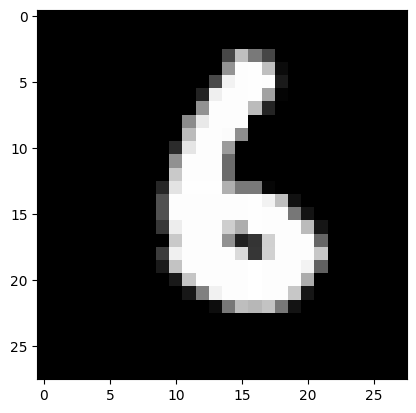

etiket: 6


In [16]:
import matplotlib.pyplot as plt

rakam = 36
plt.imshow(train_images[rakam],cmap="gray")
plt.show()
print("etiket:",train_labels[rakam])



In [ ]:
# 0-255 arası değer alan gri tonlamalı pikseller, aşağıdaki işlem ile ilk önce float32 tipine dönüştürülüp 0-1 arasına normalize edilir.
train_images = train_images.astype("float32")/255
test_images=test_images.astype("float32")/255